<a href="https://colab.research.google.com/github/Ekpen73/QA-Training/blob/main/Rose_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

The problem domain is a regression problem, which involves predicting the prices of the car.
The dataset contains columns with 26 attributes which describes the make of the car, the fuel type, body style, number of doors and so on. For a regression problem, it will require continuous values, which will be fitted into the regression model y = mx + b. Regression analysis examines the relationship between a quantitative response variable (Y) and one or more explanatory variables (X1, X2, · · · , Xn). In machine learning a weight and bias is added to the explanatory viariables. In this project we are trying to predict the price of the different cars based on the different attributes and show the correlation between them.

In [1]:
!pip install azureml.core
!pip install azureml.dataprep

     |████████████████████████████████| 2.4 MB 38.3 MB/s 
     |████████████████████████████████| 40 kB 5.6 MB/s 
     |████████████████████████████████| 547 kB 53.3 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 146 kB 41.9 MB/s 
     |████████████████████████████████| 85 kB 4.1 MB/s 
     |████████████████████████████████| 3.0 MB 42.9 MB/s 
     |████████████████████████████████| 1.3 MB 26.1 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 141 kB 57.2 MB/s 
     |████████████████████████████████| 412 kB 70.8 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 928 kB 57.0 MB/s 
     |████████████████████████████████| 178 kB 29.1 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████

In [2]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '0cd63909-99b7-4139-972d-56af8e8f1747'
resource_group = 'rose-project'
workspace_name = 'my-qa-automobileprice-ml'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='my-automobilepriceml')
dataset.to_pandas_dataframe()

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FG9JJDXYE to authenticate.
You have logged in. Now let us find all the subscriptions to which you have access...


Failed to authenticate to tenant '337d489c-a14b-414a-a0dd-029ddadfda36' due to error 'Get Token request returned http error: 400 and server response: {"error":"interaction_required","error_description":"AADSTS50076: Due to a configuration change made by your administrator, or because you moved to a new location, you must use multi-factor authentication to access '797f4846-ba00-4fd7-ba43-dac1f8f63013'.\r\nTrace ID: 0a0641fc-0946-47f7-a391-3124868ebc01\r\nCorrelation ID: 0aad5803-4a1b-4b1c-b60c-a409d380d17e\r\nTimestamp: 2021-12-06 10:01:51Z","error_codes":[50076],"timestamp":"2021-12-06 10:01:51Z","trace_id":"0a0641fc-0946-47f7-a391-3124868ebc01","correlation_id":"0aad5803-4a1b-4b1c-b60c-a409d380d17e","error_uri":"https://login.microsoftonline.com/error?code=50076","suberror":"basic_action"}'.Will continue to look for other tenants to find subscriptions to which you have access


AuthenticationException: ignored

Working with the dataset consumed from Azureml is giving errors as seen above and have therefore used python code in jupyter notebook for data exploration, statical analysis and visialization.  While the Azure automatedMl is used to create report for model evaluation.  This is pasted below

In [5]:
import pandas as pd
automp_df = pd.read_csv('Automobile price data.csv')
automp_df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [35]:
automp_df.value_counts().count()

205

In [36]:
automp_df.value_counts()

symboling  normalized-losses  make           fuel-type  aspiration  num-of-doors  body-style   drive-wheels  engine-location  wheel-base  length  width  height  curb-weight  engine-type  num-of-cylinders  engine-size  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  price
 3         ?                  volkswagen     gas        std         two           convertible  fwd           front            94.5        159.3   64.2   55.6    2254         ohc          four              109          mpfi         3.19  3.4     8.5                90          5500      24        29           11595    1
 0         89                 subaru         gas        std         four          wagon        fwd           front            97.0        173.5   65.4   53.0    2455         ohcf         four              108          mpfi         3.62  2.64    9.0                94          5200      25        31           10198    1
           ?                  audi           

In [33]:
automp_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [ ]:
# copied from jupyter notebook

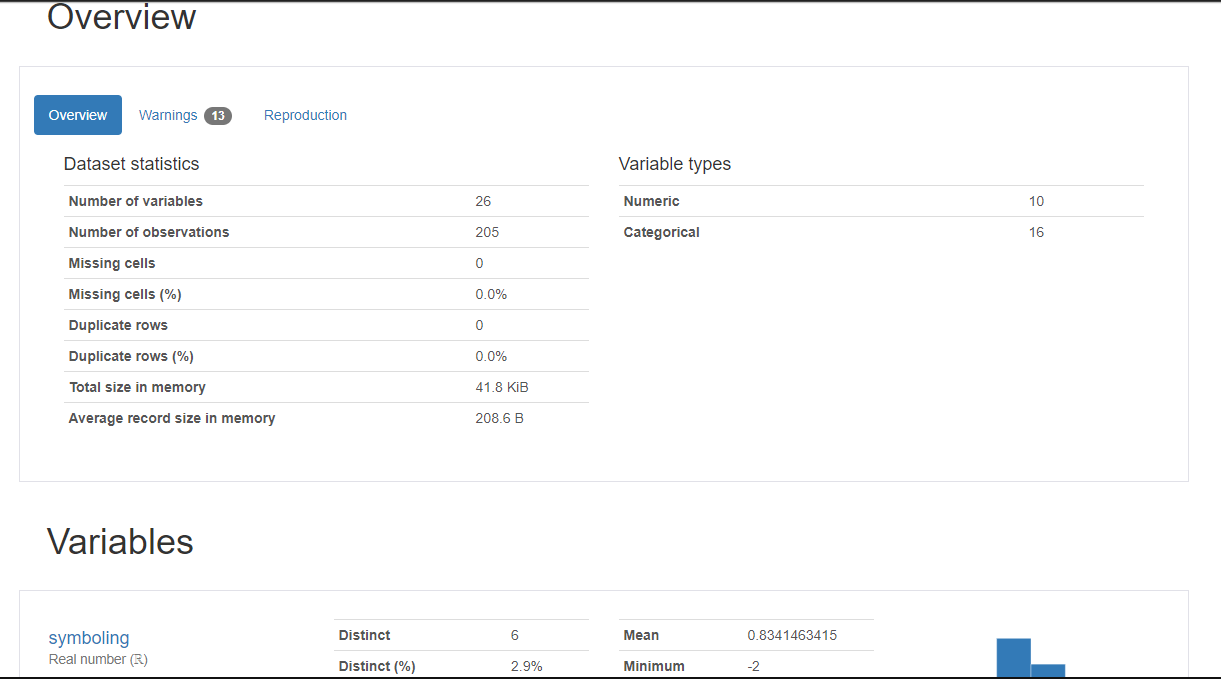

The dataset consist of numerical and categorical data.  The problem domain is to predict the price of automobile cars given all the variables that could drive the price.

In [9]:
automp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Data Vizualization for Automobile price data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa5854c710>,
      dtype=object)

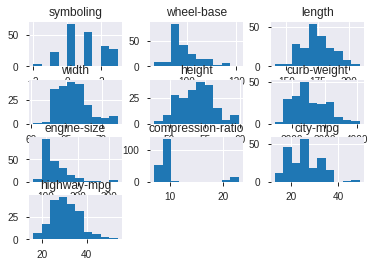

In [37]:
automp_df.hist()

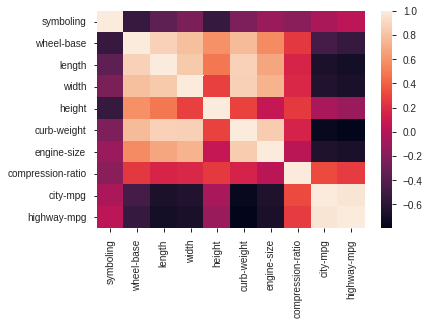

In [44]:
%matplotlib inline
import seaborn as sns
g = sns.heatmap(automp_df.corr()) # checking for correlation in the dataset
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Model evaluation using AutomatedML for Automobile price dataset

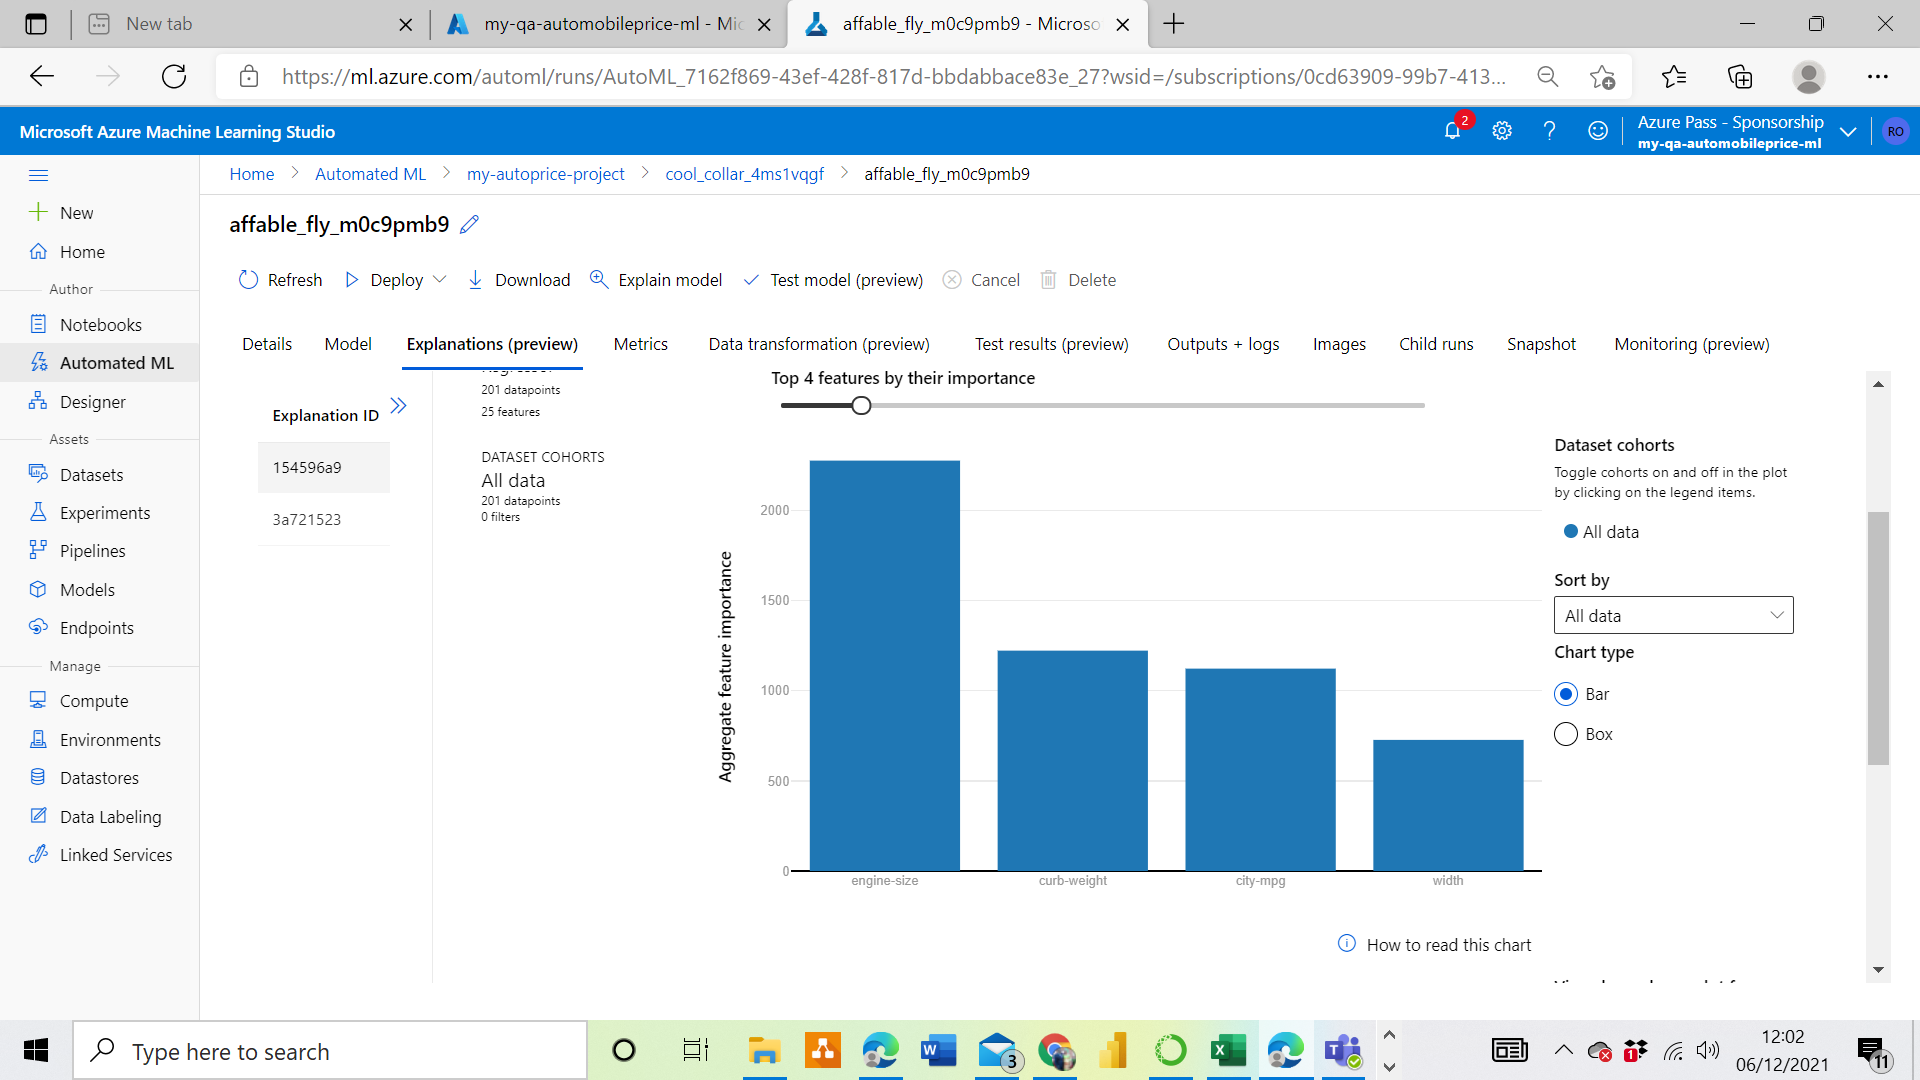

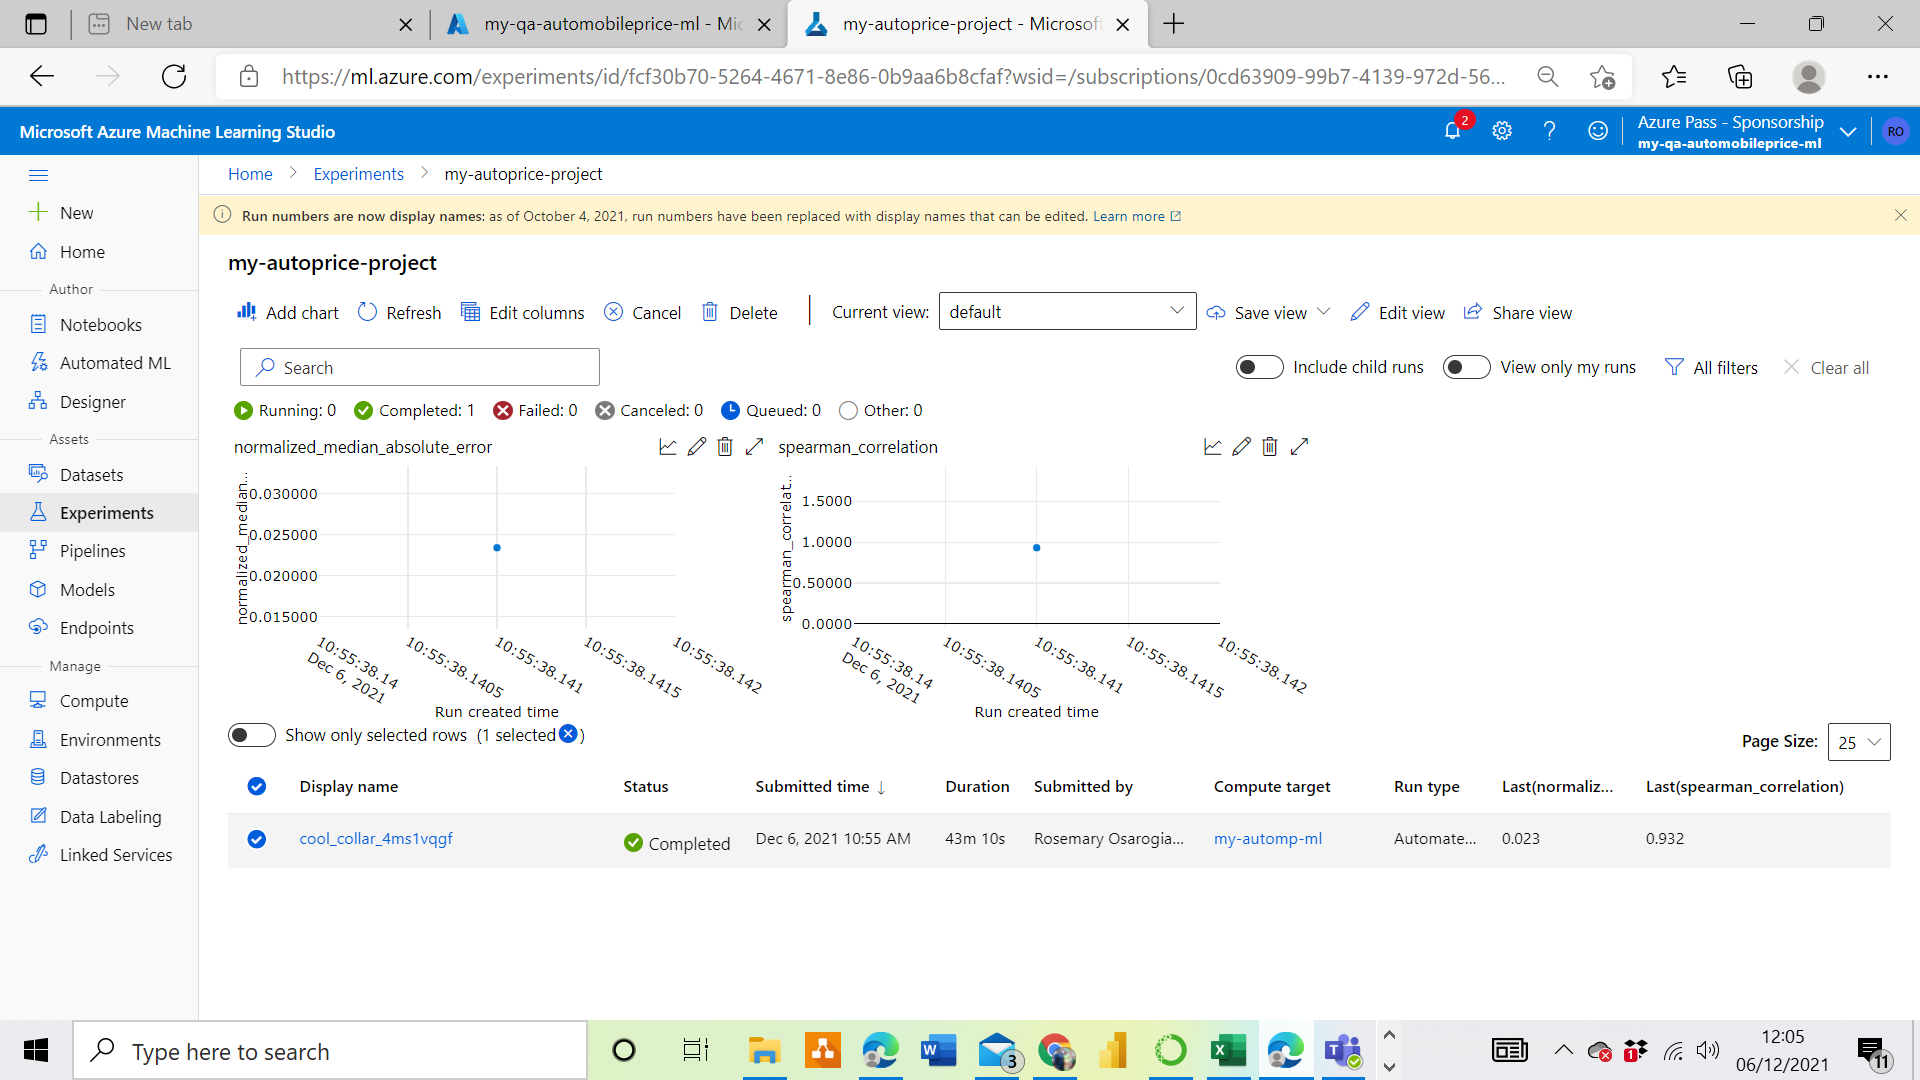

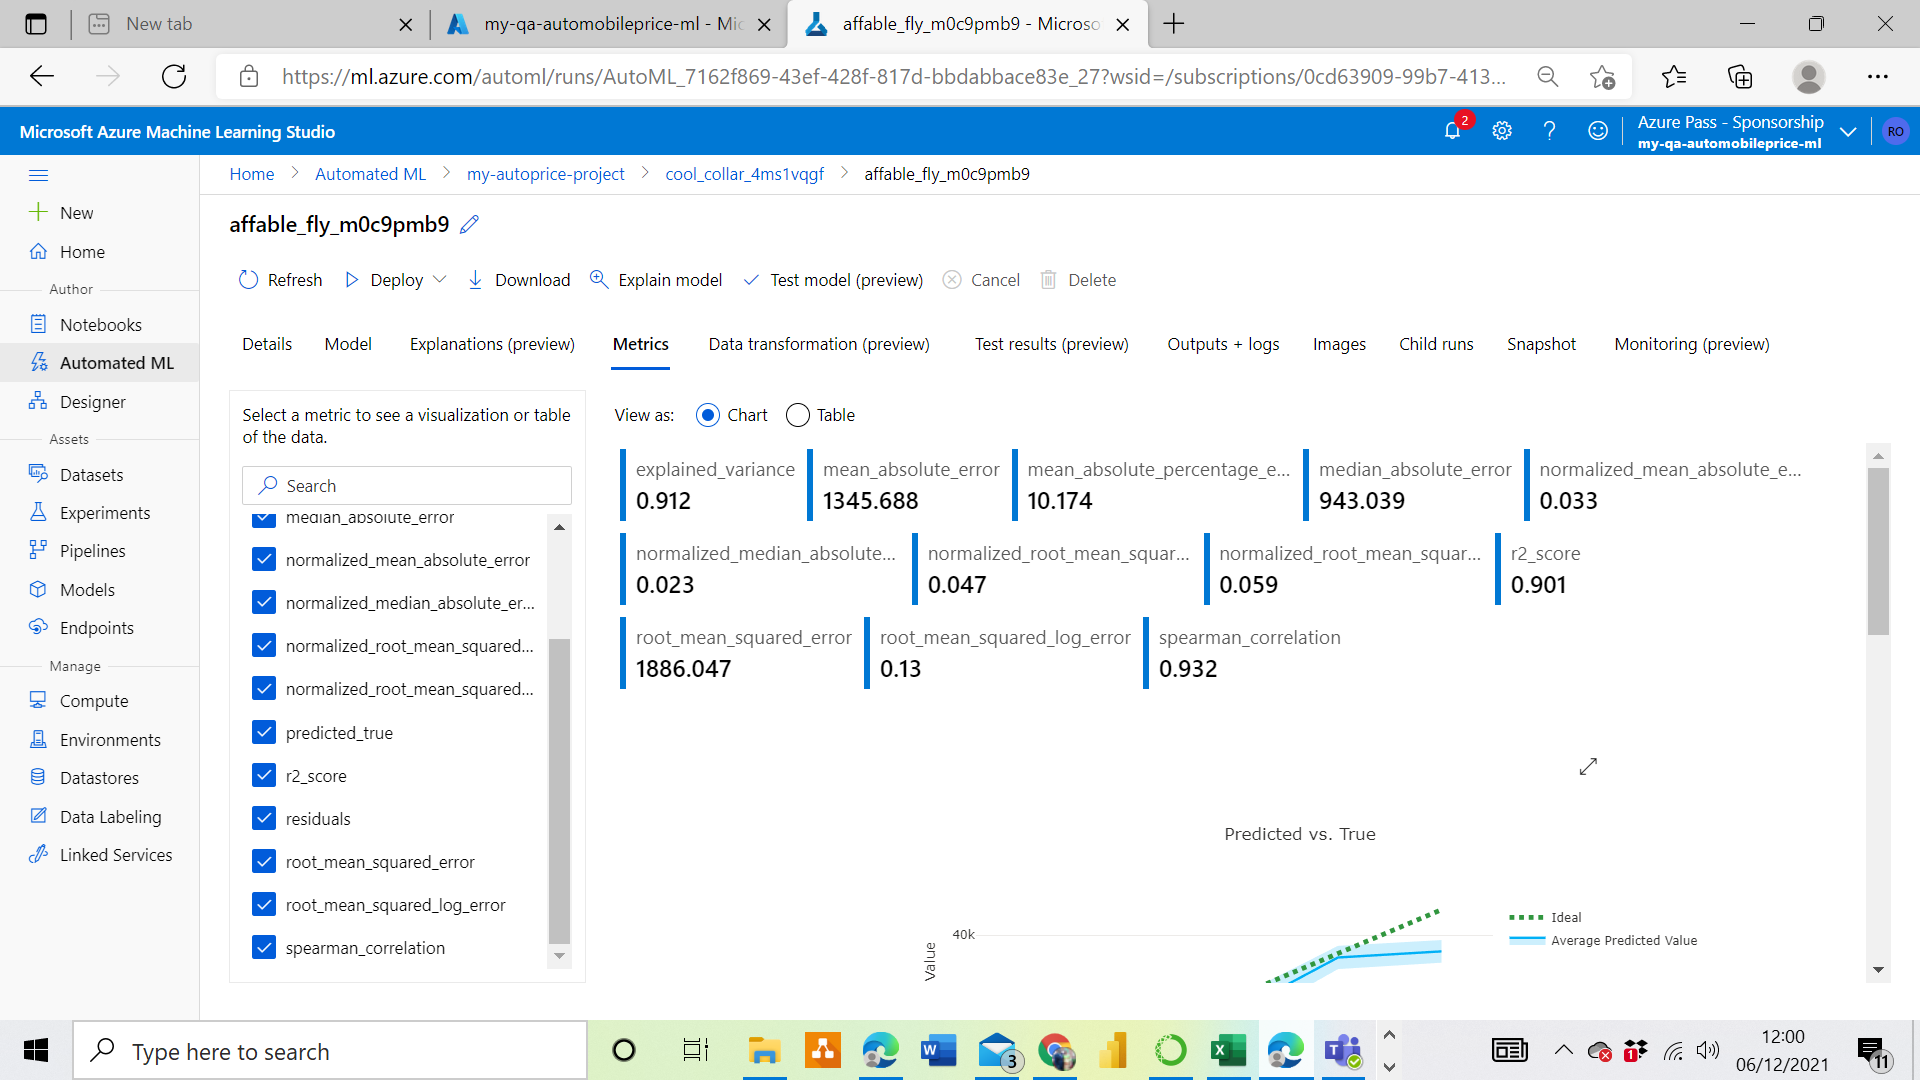

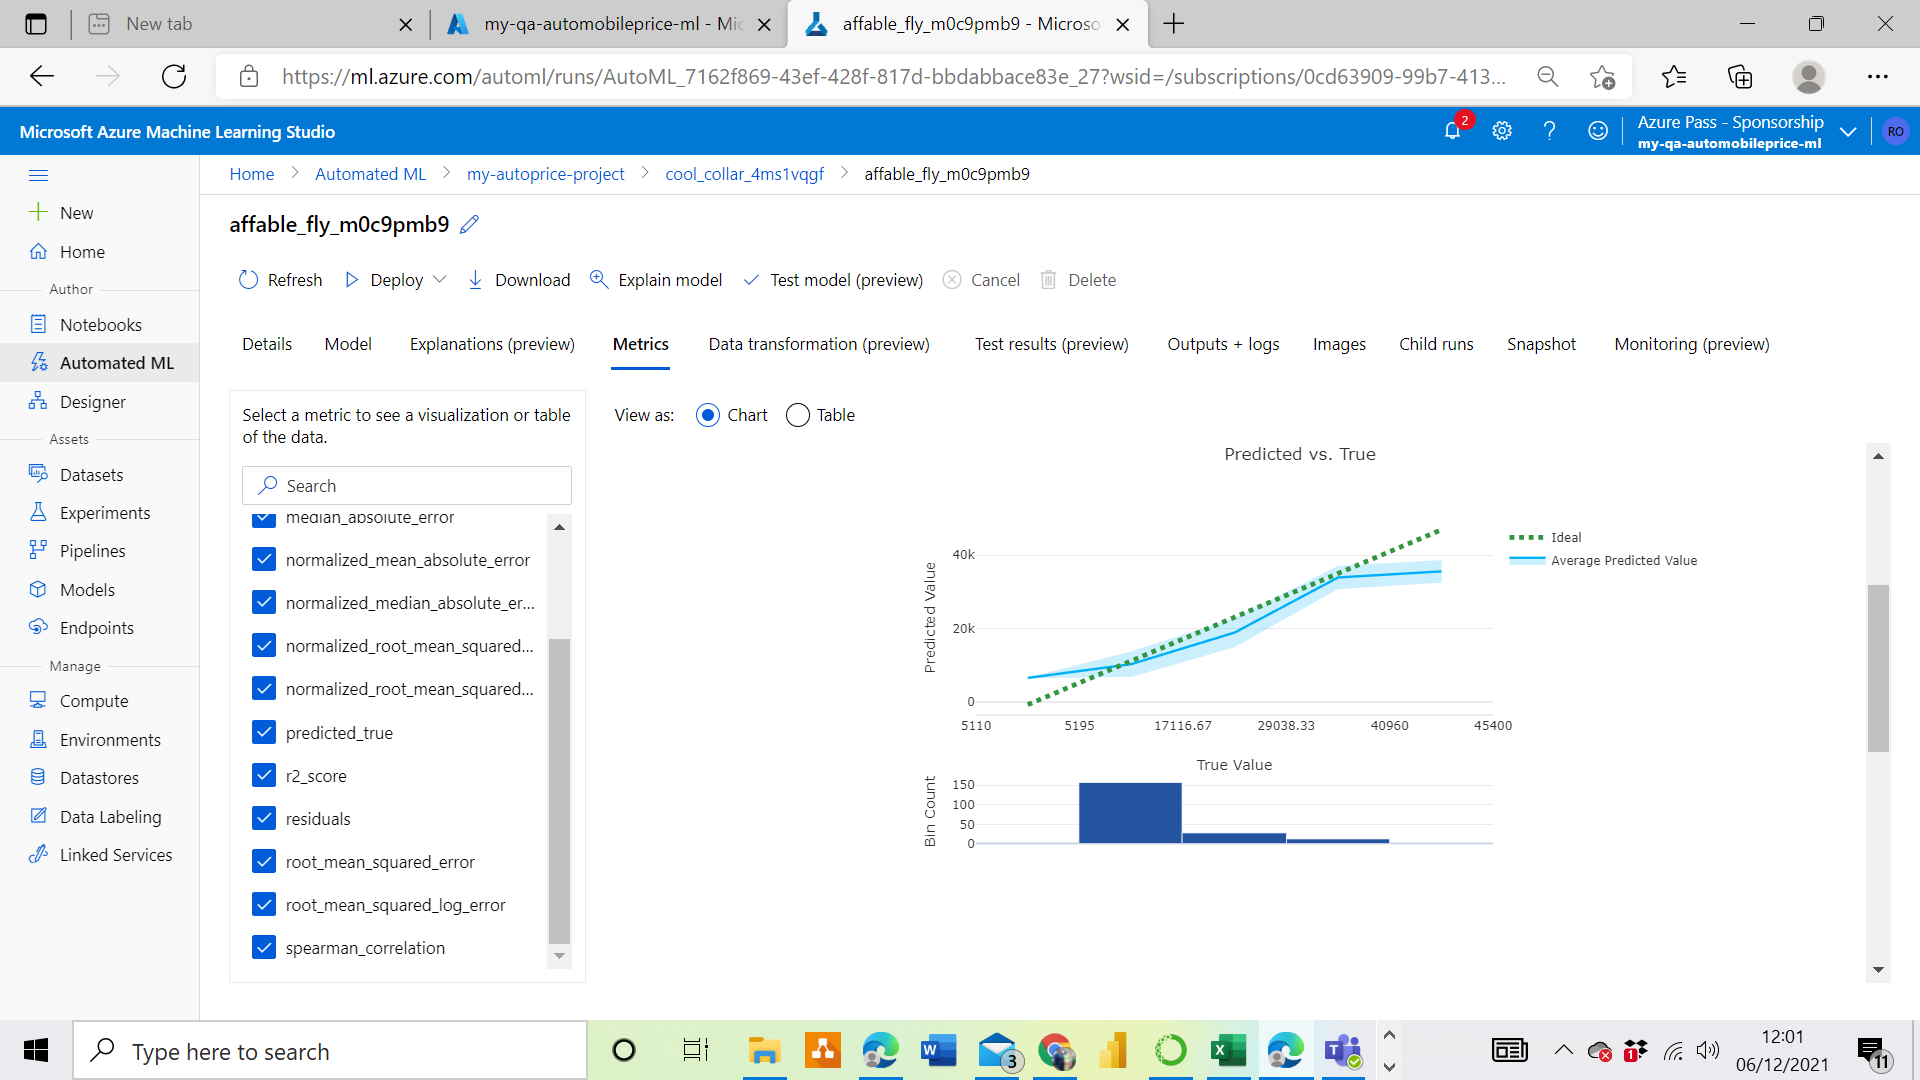

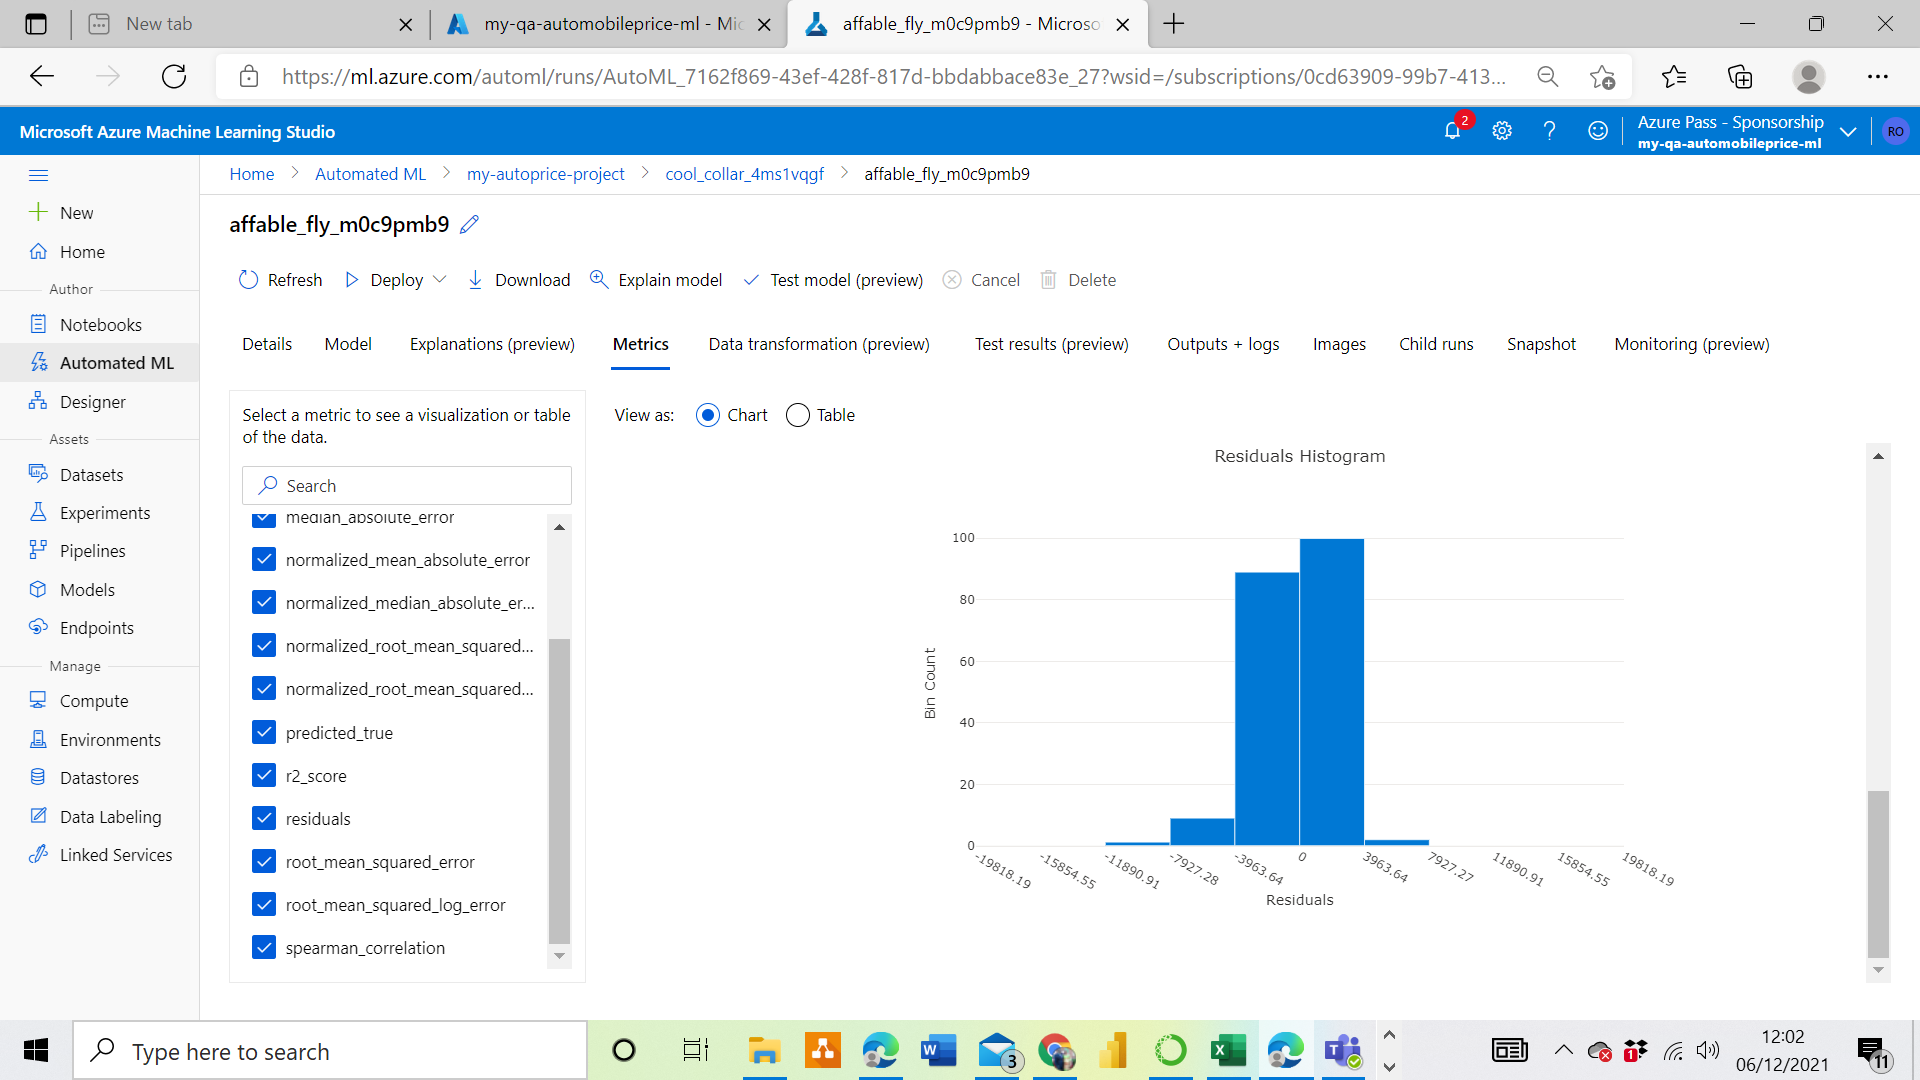

### Q. Identify candidate questions for your machine learning project

### Q. Identify a suitable dataset for your canditate question(s)
Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it

A candidate dataset like the dataset above is taken from the kaggle website, player csv and the problem domain is using regression model to predict the value of a player.
The dataset consists of 16 columns and 500 hundred rows, also a continuous values.

### Explore the dataset using python library


In [11]:
import pandas as pd # explore the dataset
players_df=pd.read_csv('players.csv')
players_df.head(5)

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


#### The profiling code seems not to execute in colab, I ran it in jupyter note and copied it here

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(players_df, title='Pandas Profiling Report')
profile

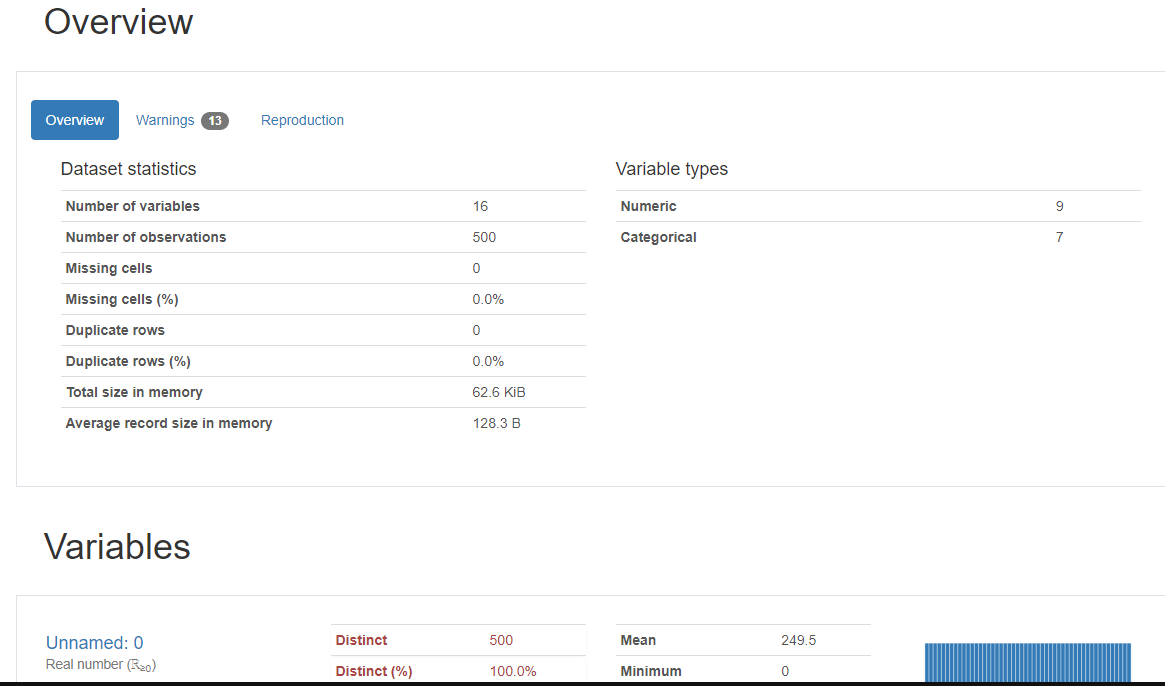

In [12]:
players_df.shape

(500, 16)

In [13]:
players_df.isnull().sum() # Check for null values in the the columns

Unnamed: 0                     0
Name                           0
Position                       0
Age                            0
Markey Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
dtype: int64

### Visualise the correlations in the data

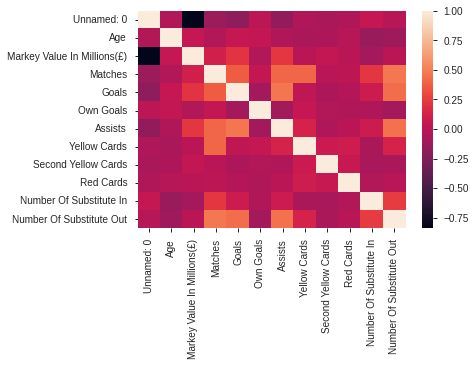

In [16]:
%matplotlib inline
import seaborn as sns
g = sns.heatmap(players_df.corr())
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)

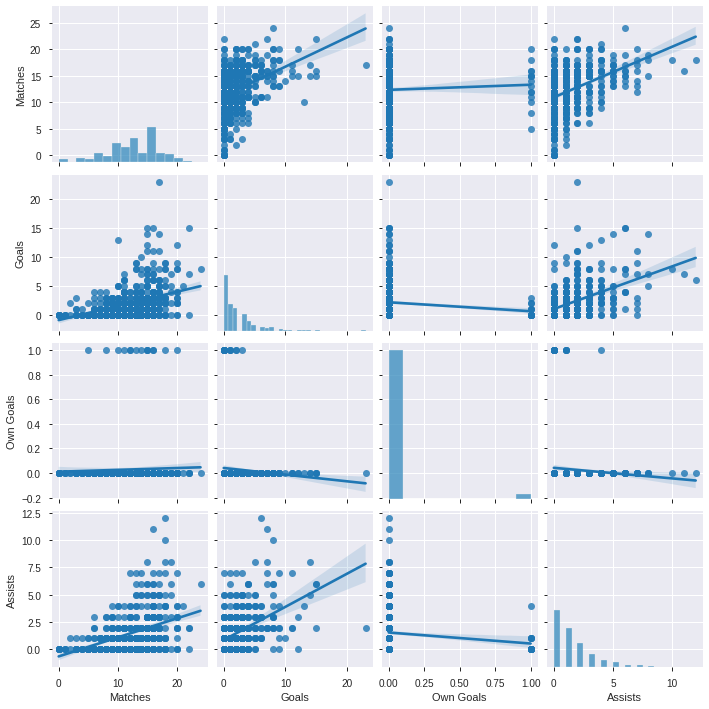

In [17]:
sns.pairplot(players_df[['Matches', 'Goals', 'Own Goals','Assists']], kind='reg')

### Q. Generate a descriptive statistics report for the columns in your dataset

In [18]:
players_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500.0,249.5000,144.481833,0.0,124.75,249.5,374.25,499.0
Age,500.0,24.9680,3.165916,16.0,23.00,25.0,27.00,36.0
Markey Value In Millions(£),500.0,31.5378,17.577697,16.2,19.80,25.2,36.00,144.0
Matches,500.0,12.3960,4.342453,0.0,10.00,13.0,16.00,24.0
Goals,500.0,2.1600,2.880102,0.0,0.00,1.0,3.00,23.0
Own Goals,500.0,0.0300,0.170758,0.0,0.00,0.0,0.00,1.0
Assists,500.0,1.5120,1.852760,0.0,0.00,1.0,2.00,12.0
Yellow Cards,500.0,1.5920,1.445585,0.0,0.00,1.0,2.00,7.0
Second Yellow Cards,500.0,0.0360,0.186477,0.0,0.00,0.0,0.00,1.0
Red Cards,500.0,0.0460,0.209695,0.0,0.00,0.0,0.00,1.0


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

Missing completely at random (MCAR) ~ Missing values do not relates to any data in the dataset and there is no pattern to relate the actual missing values. For an example if a particular car engine size is not found in the data set. The simply way is the delete the rows.

Missing at random (MAR) ~ Missing data have a relationship with other variables in the dataset. For example in the autoprice dataset where the engine size of a particular make of car is missing at random. The mean imputation will be used to fill the missing value

Missing not at random (MNAR) ~ The missing values is related to other variables in the dataset and are not at random but has relationship with other values in the data set. For example when engine size of a make of car is not recorded, the mean can be use to fill up the missing values.

#### Clean the data using interquartile range

In [20]:
Q1 = players_df.quantile(0.25)
Q3 = players_df.quantile(0.75)
IQR = Q3 - Q1
#prints the IQR scores, which can be used to detect outliers
print(IQR)

Unnamed: 0                     249.50
Age                              4.00
Markey Value In Millions(£)     16.20
Matches                          6.00
Goals                            3.00
Own Goals                        0.00
Assists                          2.00
Yellow Cards                     2.00
Second Yellow Cards              0.00
Red Cards                        0.00
Number Of Substitute In          3.25
Number Of Substitute Out         5.00
dtype: float64


In [23]:
#IQR scores calculated earlier to remove outliers
players_df1 =players_df1[~((players_df < (Q1 - 1.5 * IQR)) |(players_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(players_df1.shape)

(349, 16)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [24]:
X=players_df1.iloc[:,7:]
y=players_df1['Markey Value In Millions(£)'] #= pd.factorize(df_out.Class)[0]


In [25]:
from sklearn.model_selection import train_test_split

# we make our test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# and we make our validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [26]:
import warnings # Allows better control of warning messages
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

LinearRegression()

In [28]:
predicted = reg.predict(X_test)[0]
print(predicted)

25.926278027993057


In [29]:
reg.coef_

array([-1.80372784e-02,  7.96310202e-01, -1.66533454e-16, -1.26068536e-01,
        5.28737475e-01,  0.00000000e+00,  0.00000000e+00, -7.53389014e-01,
        2.39260690e-01])

# Part 4: Model Evaluation

Using python code

In [30]:
from sklearn.metrics import r2_score
from sklearn import metrics

mae = metrics.mean_absolute_error(y_train, reg.predict(X_train))
mse = metrics.mean_squared_error(y_train, reg.predict(X_train))
rsq = metrics.r2_score(y_train, reg.predict(X_train))

print('Mean Absollute Error:', mae)
print('Mean Squared Error:', mse)
print('Coefficient of Determination:', rsq)
print('Accuracy training : {:.2f}'.format(reg.score(X_train,y_train)))
print('Accuracy testing : {:.2f}'.format(reg.score(X_test,y_test)))


Mean Absollute Error: 7.97852979230899
Mean Squared Error: 102.30776323372412
Coefficient of Determination: 0.044092269456350586
Accuracy training : 0.04
Accuracy testing : -0.08


###Model Evaluation report from azure automatedML

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

The Regression Metric will be used for the model evaluation and the reports for the candidate dataset from azure automatedML is pasted below

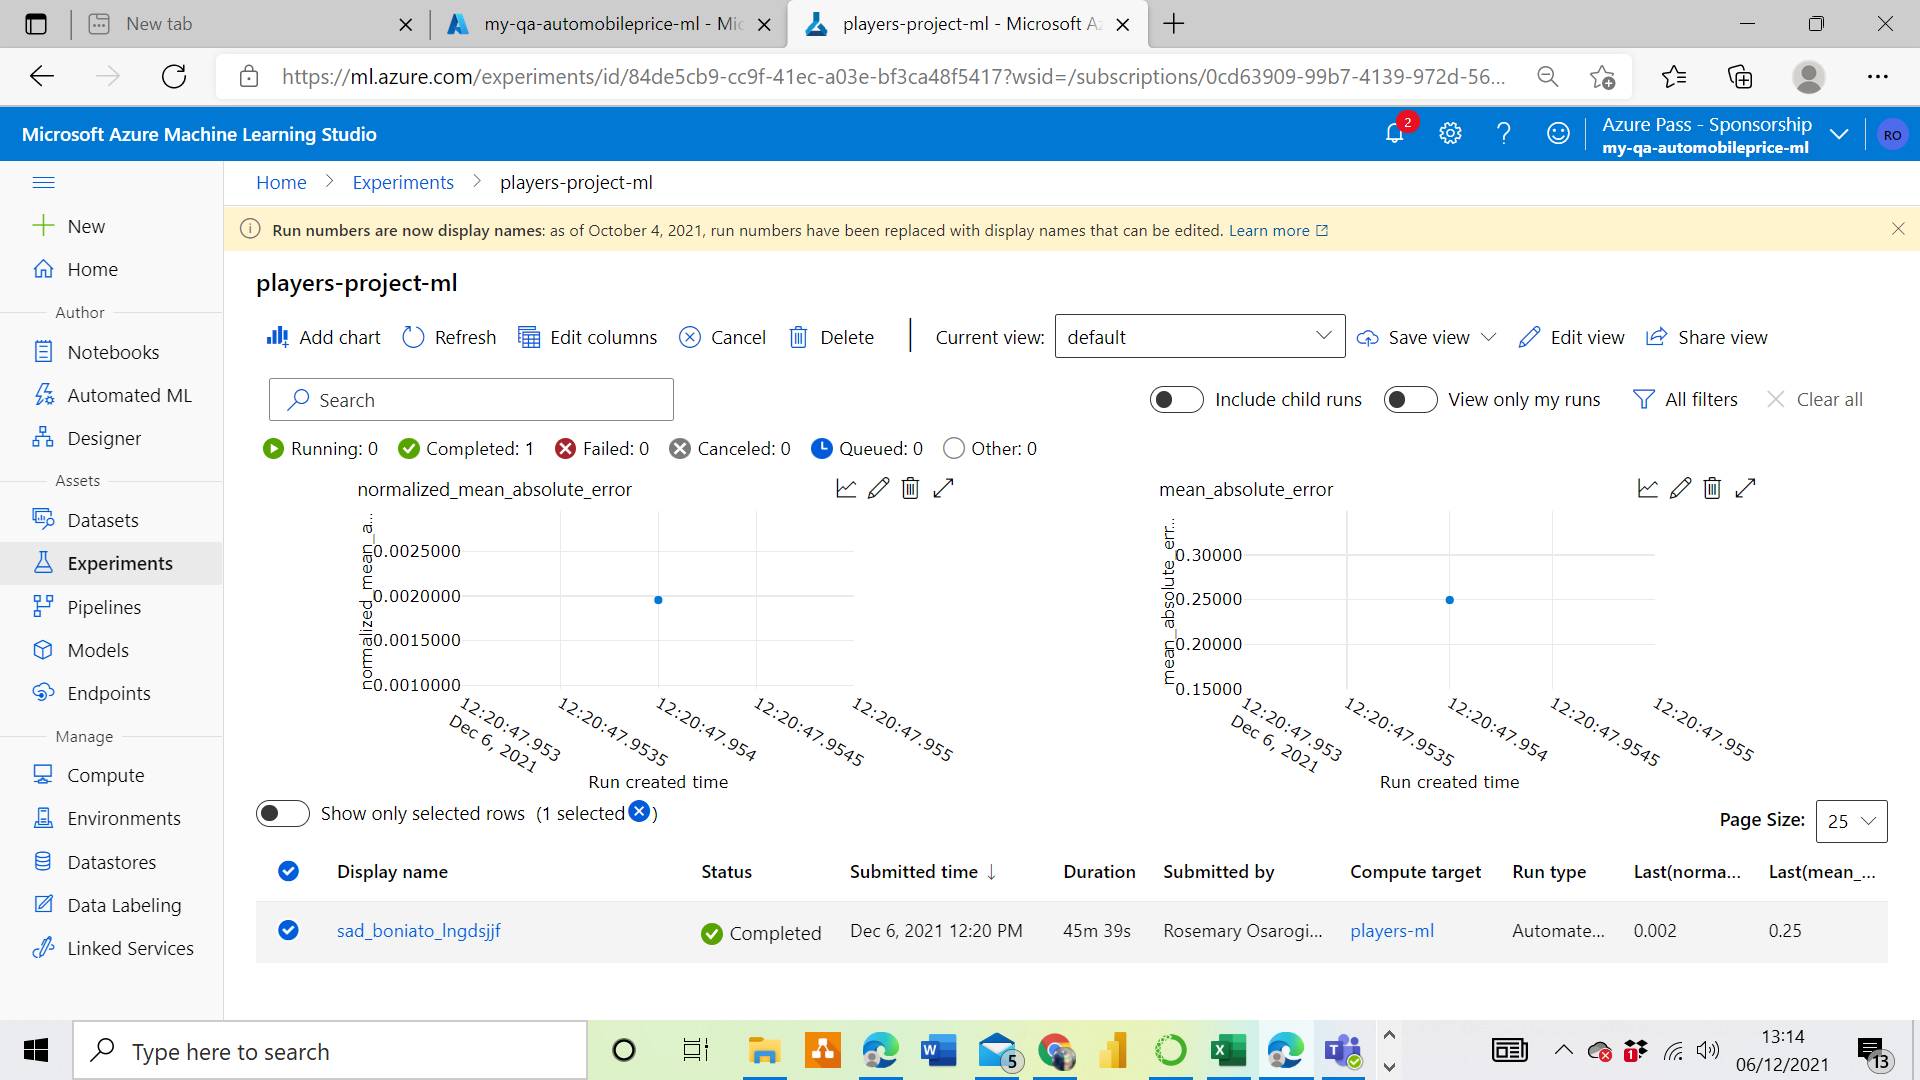

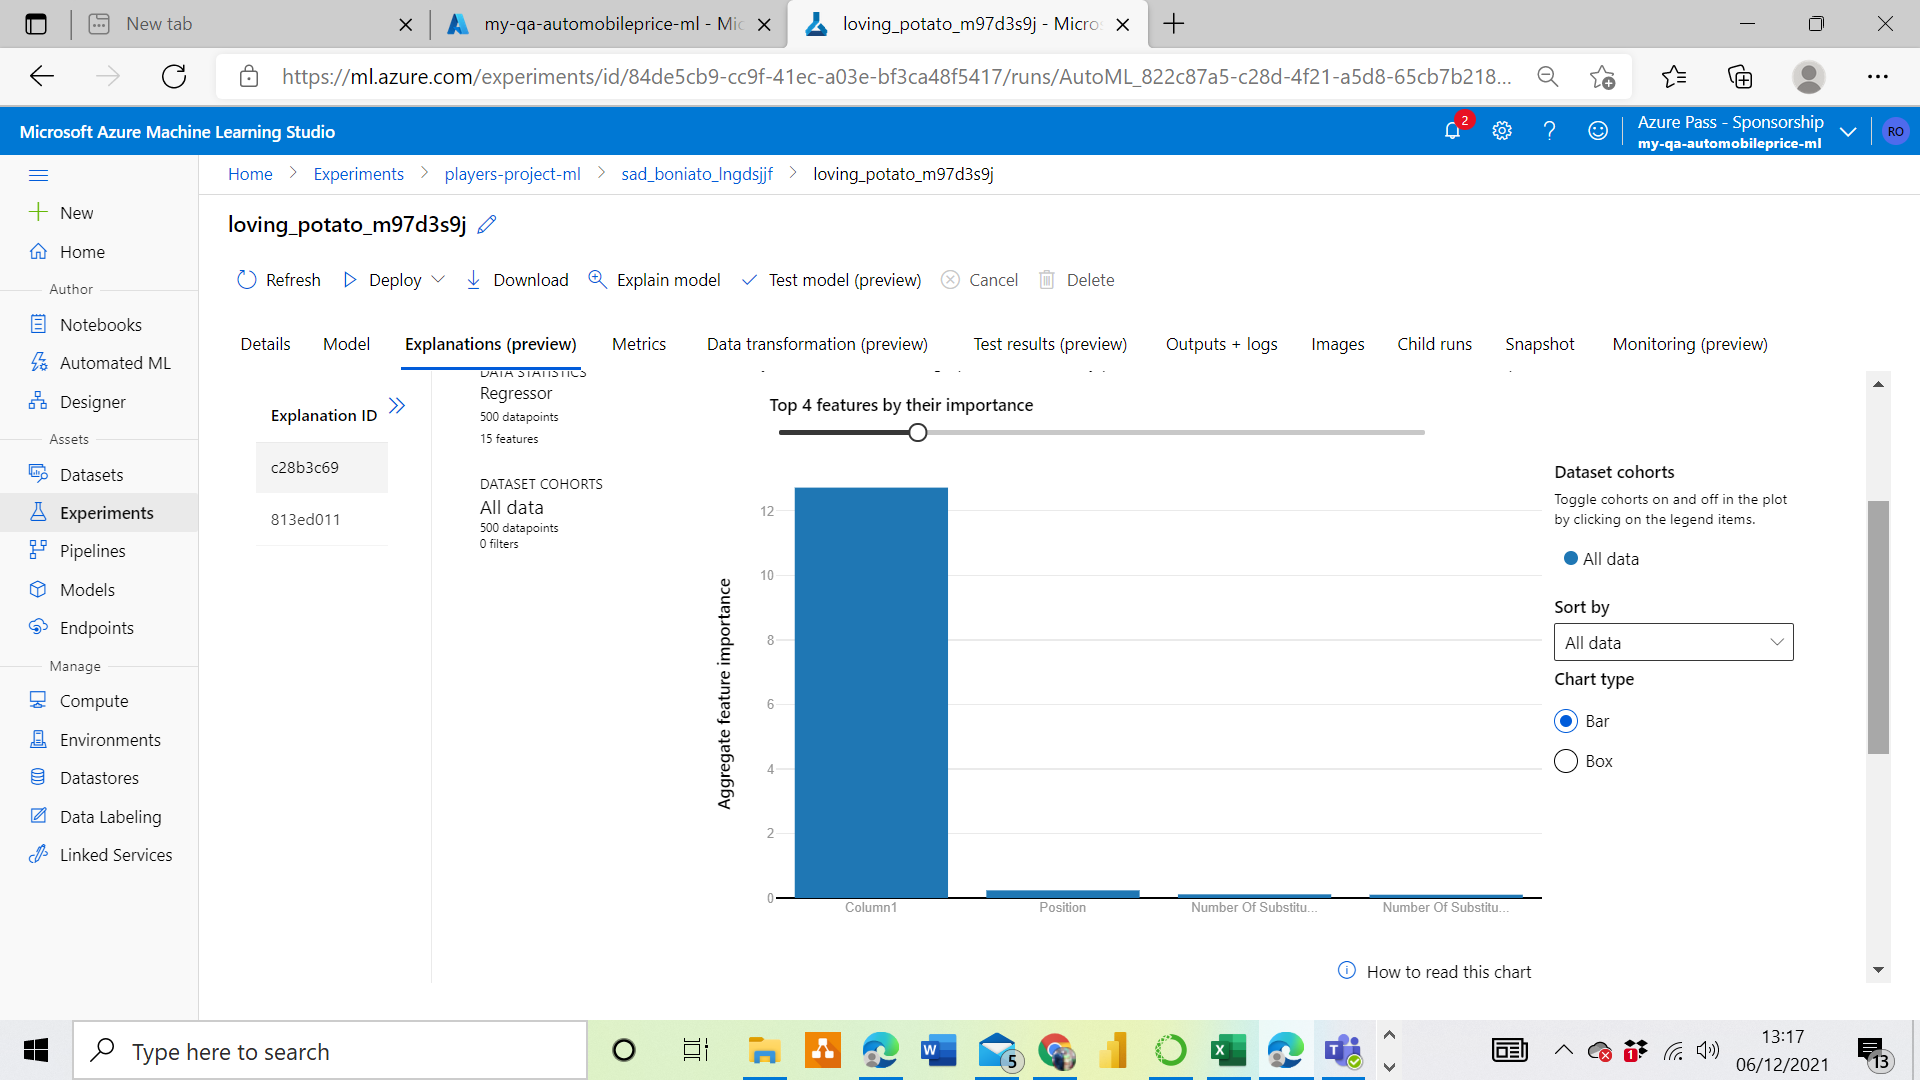

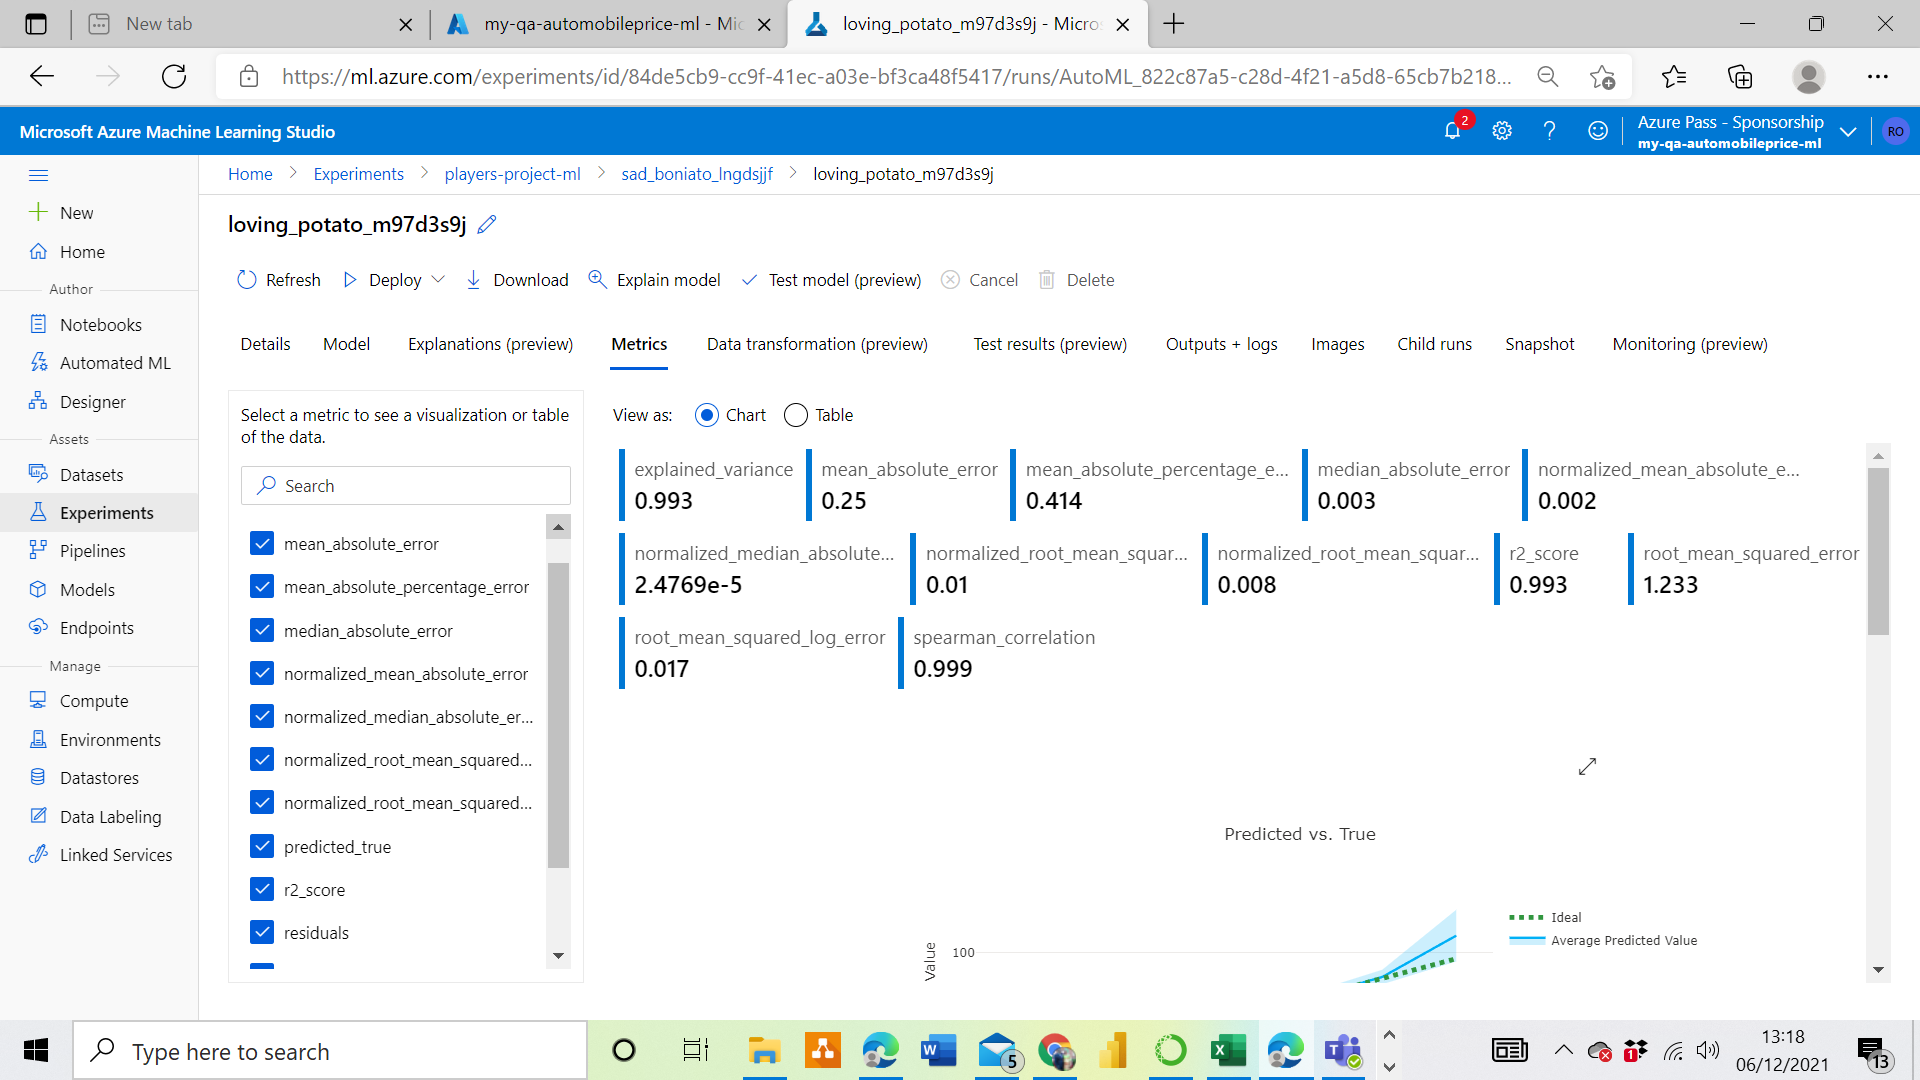

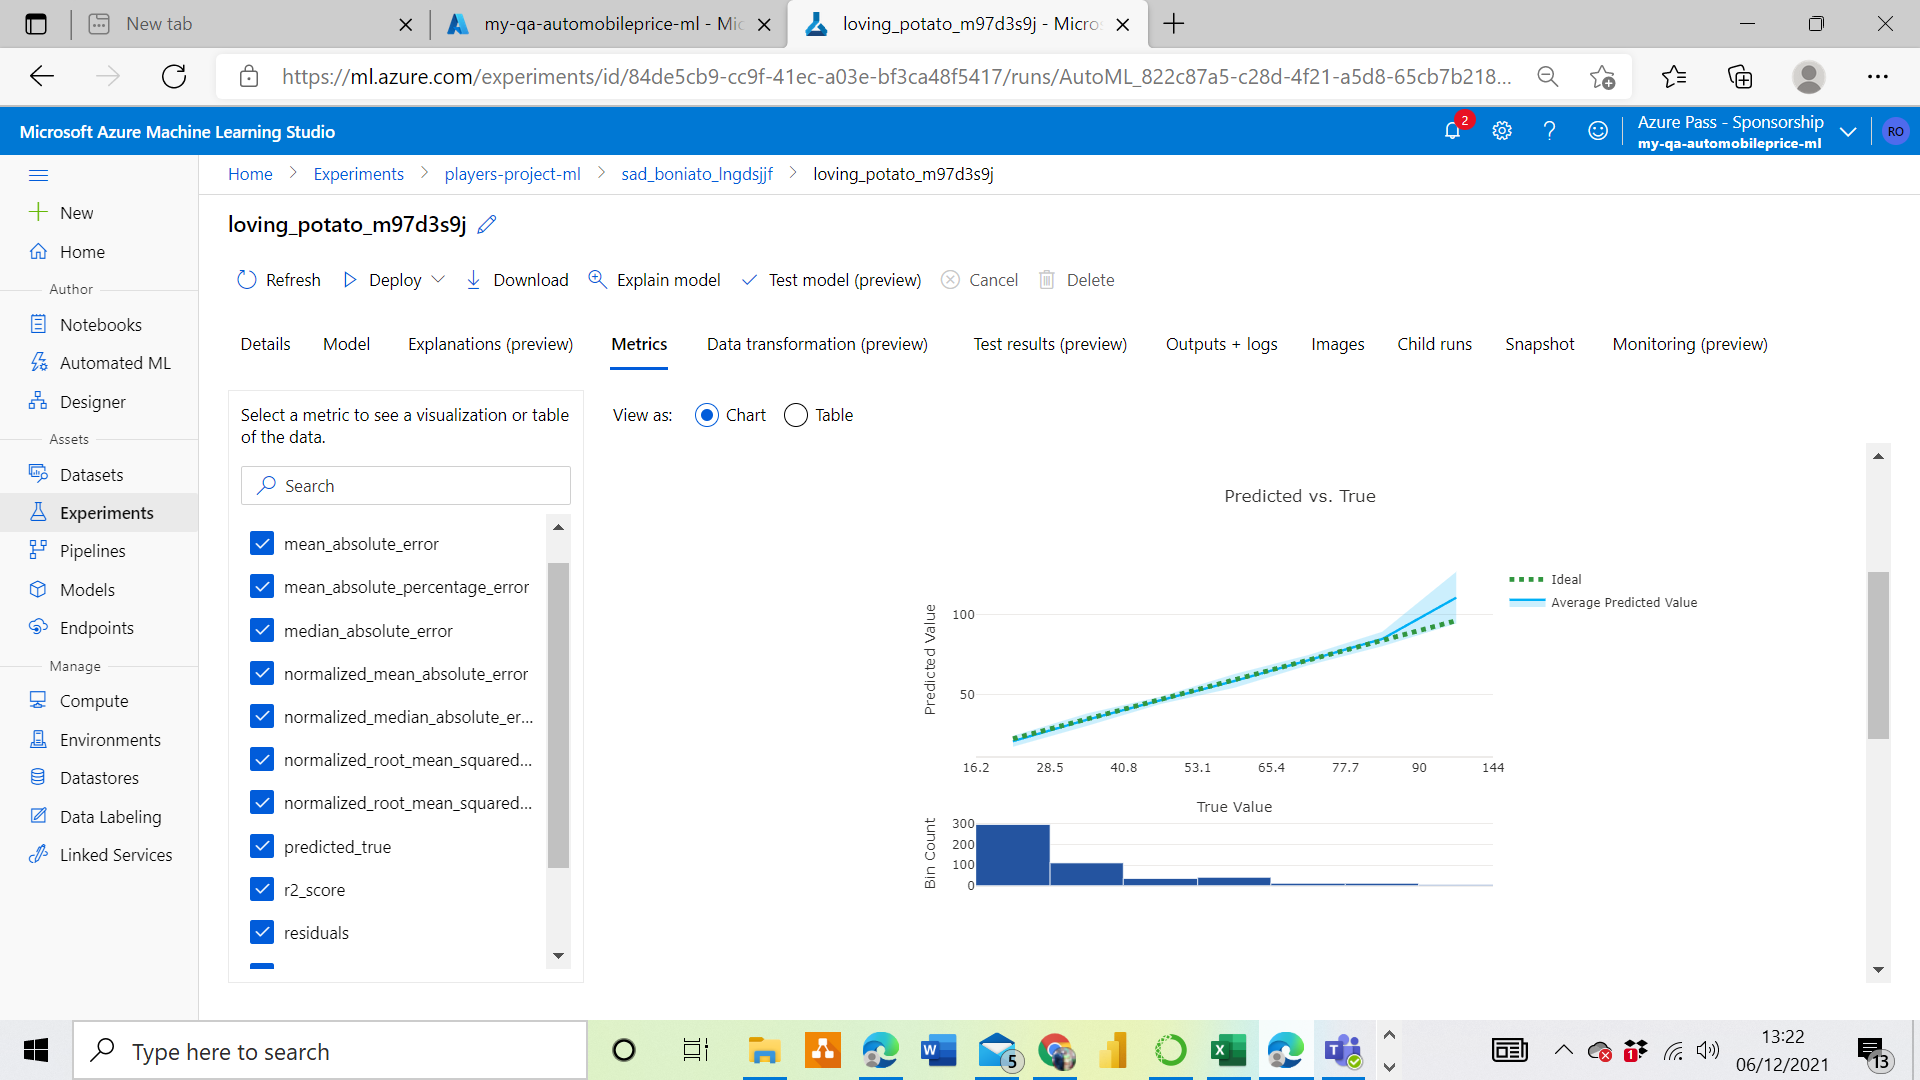

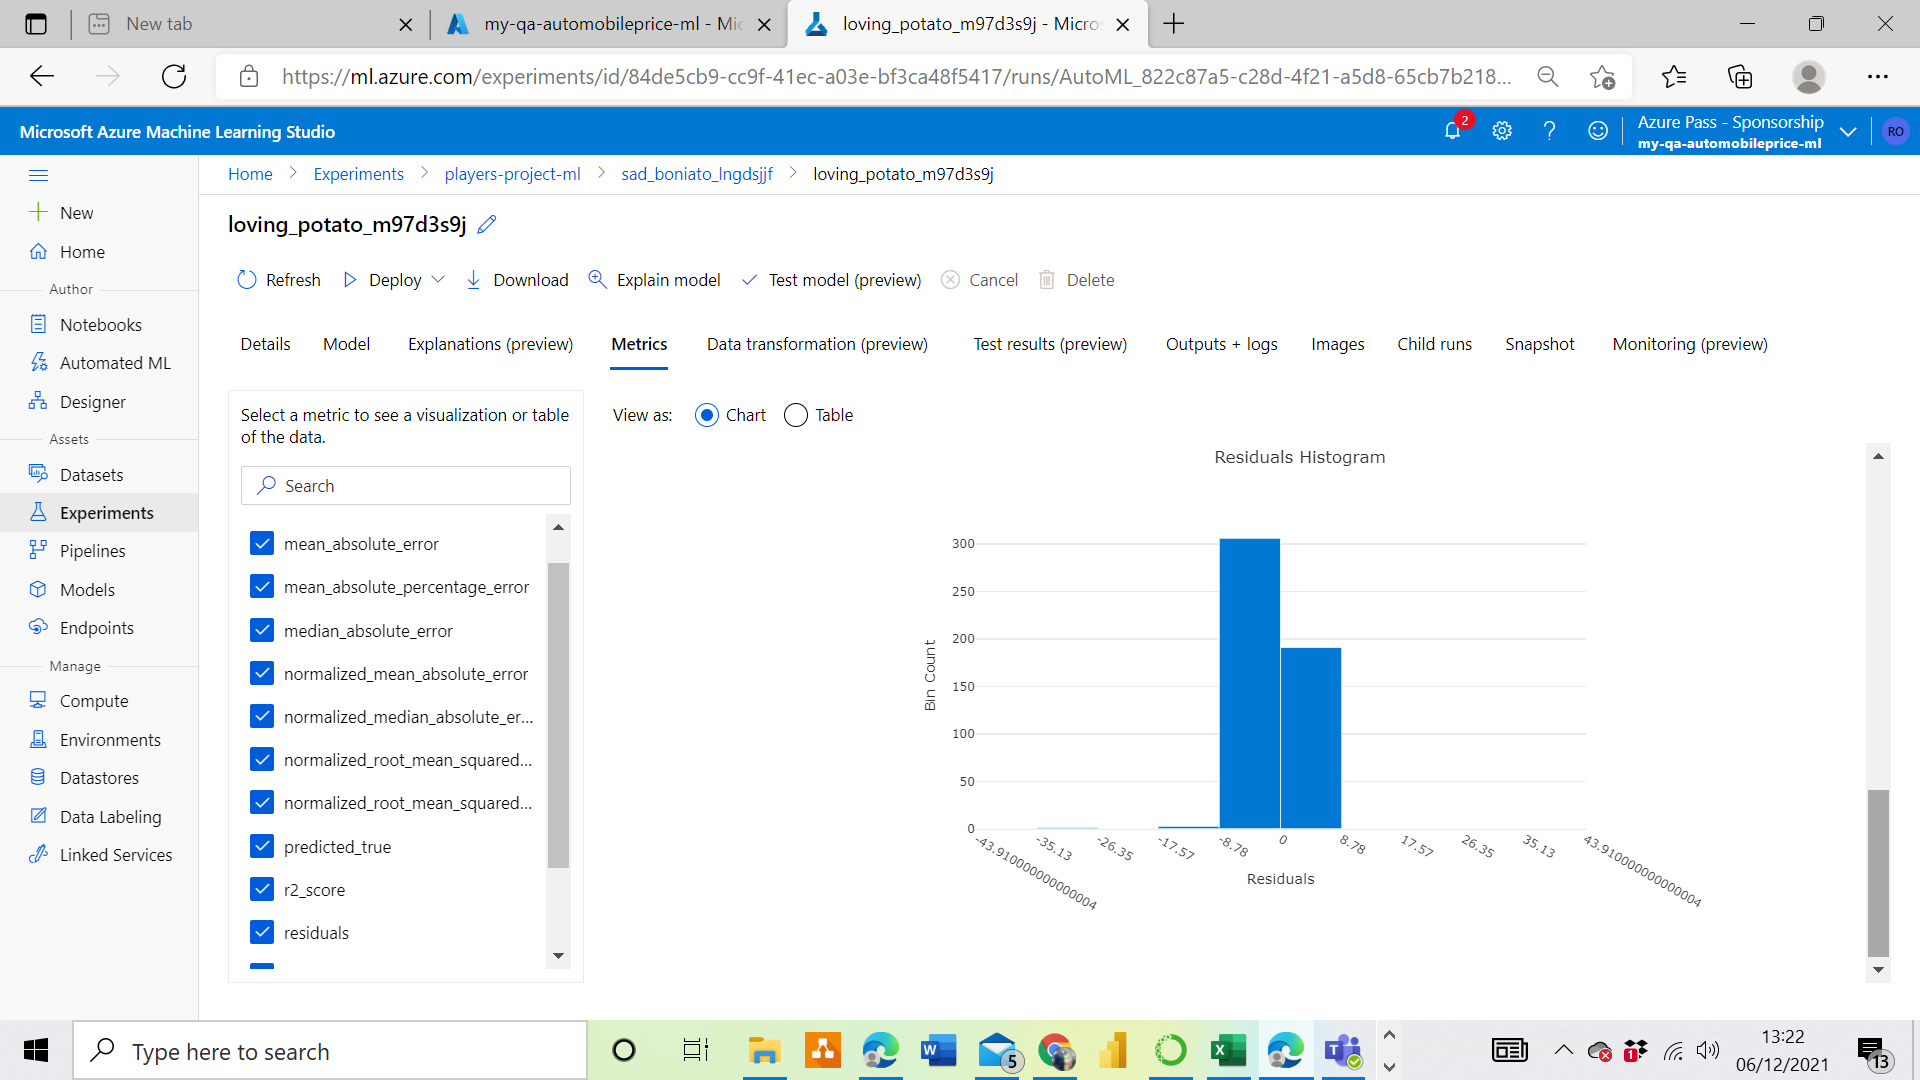

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/